## Analisa Data Fantasy Premier League 2024-2025

### Pendahuluan 
Analisis data Fantasy Premier League (FPL) bertujuan untuk mengidentifikasi fitur-fitur pemain yang paling berkontribusi terhadap perolehan poin dan value pemain. Dengan pemahaman yang lebih baik tentang faktor-faktor ini, kita dapat merancang model prediksi untuk merumuskan line-up tim yang optimal, memaksimalkan perolehan poin sesuai dengan batasan budget.

### Goals

- Identifikasi fitur penting yang mempunyai korelasi kuat dengan perolehan poin.
- Optimasi line-up dengan mempertimbangkan batasan budget dan kombinasi pemain yang seimbang.

### Libraries and Packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sql_server import engine

from scipy import stats

### Data
Data berasal dari API resmi Fantasy Premier League, yang berisi bermacam info seperti; nama pemain, team, gol, poin pemain, dan lainnya, yang ditarik dengan python dan kemudian dibersihkan dan ditransformasi, kemudian disimpan ke dalam database SQL Server.
Untuk analisa data ini data tersebut akan ditarik dari SQL Server ke dataframe pandas.

#### Load Datasets

In [2]:
df = pd.read_sql_query('''\
                       select * from analisa_data
                       where gameweek = 25
                       ''', engine)

In [3]:
df.head()

,gameweek,web_name,first_name,team,dreamteam,result_points,team_strength,opponent_strength,now_cost,form,total_points,bonus,points_per_game,minutes,goals_scored,assists,clean_sheets,saves,value_form,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,influence,creativity,threat,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,starts_per_90,clean_sheets_per_90,position,value
0,25,G.Jesus,Gabriel,Arsenal,False,0,1235,1250,66,0.0,42,6,2.5,600,3,2,2,0,0.0,5,0,0,0,4,0,154.4,119.5,255.0,6,3.05,0.52,3.57,5.82,0.46,0.0,0.08,0.54,0.87,0.75,0.90,0.30,Forward,6.4
1,25,Gabriel,Gabriel,Arsenal,True,2,1235,1250,63,2.8,94,8,4.3,1898,3,2,7,0,0.4,20,0,0,0,3,0,496.4,170.8,272.0,22,2.56,1.03,3.59,19.52,0.12,0.0,0.05,0.17,0.93,0.95,1.04,0.33,Defender,14.9
2,25,Havertz,Kai,Arsenal,False,12,1235,1250,78,5.5,96,14,4.6,1839,9,3,7,0,0.7,20,0,0,0,4,0,467.2,257.0,701.0,21,9.39,1.63,11.02,19.00,0.46,0.0,0.08,0.54,0.93,0.98,1.03,0.34,Forward,12.3
3,25,J.Timber,Jurriën,Arsenal,False,1,1235,1250,56,2.2,73,5,3.5,1755,1,1,7,0,0.4,16,0,0,0,7,0,276.2,221.9,187.0,20,0.75,1.01,1.76,15.51,0.04,0.0,0.05,0.09,0.80,0.82,1.03,0.36,Defender,13.0
4,25,Jorginho,Jorge Luiz,Arsenal,False,0,1235,1250,47,0.0,13,0,1.3,456,0,0,1,0,0.0,5,0,0,0,3,0,35.8,64.7,3.0,6,0.04,0.47,0.51,4.27,0.01,0.0,0.09,0.10,0.84,0.99,1.18,0.20,Midfielder,2.8


In [4]:
df.shape

(537, 43)

In [5]:
cols = ['form', 'points_per_game', 'now_cost',  'value_form', 'influence', 'creativity', 'threat', 'expected_goals', 'expected_assists', 'expected_goal_involvements', 'expected_goals_conceded']
df[cols] = df[cols].astype(float)
df['dreamteam'] = df['dreamteam'].astype(int)

In [6]:
df.dtypes

gameweek                               int64
web_name                              object
first_name                            object
team                                  object
dreamteam                              int32
result_points                          int64
team_strength                          int64
opponent_strength                      int64
now_cost                             float64
form                                 float64
total_points                           int64
bonus                                  int64
points_per_game                      float64
minutes                                int64
goals_scored                           int64
assists                                int64
clean_sheets                           int64
saves                                  int64
value_form                           float64
goals_conceded                         int64
own_goals                              int64
penalties_saved                        int64
penalties_

In [7]:
df = df[df['position'] != 'Manager']
df = df[df['value'] != 0]

In [8]:
df.shape

(518, 43)

In [9]:
df.isnull().any()

gameweek                             False
web_name                             False
first_name                           False
team                                 False
dreamteam                            False
result_points                        False
team_strength                        False
opponent_strength                    False
now_cost                             False
form                                 False
total_points                         False
bonus                                False
points_per_game                      False
minutes                              False
goals_scored                         False
assists                              False
clean_sheets                         False
saves                                False
value_form                           False
goals_conceded                       False
own_goals                            False
penalties_saved                      False
penalties_missed                     False
yellow_card

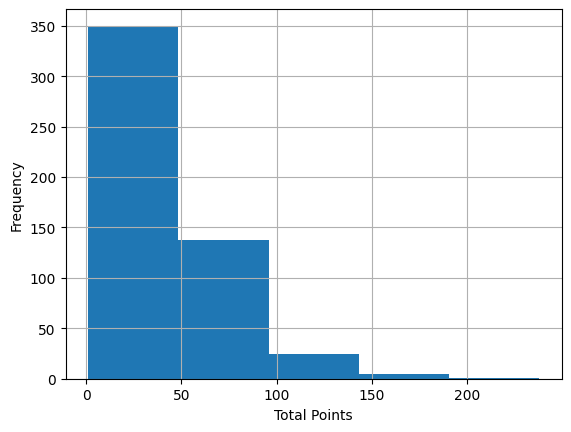

In [10]:
hist = df['total_points'].hist(bins=5)

plt.xlabel('Total Points') 
plt.ylabel('Frequency') 
  
# Display the histogram 
plt.show() 

In [11]:
data = df[df['starts'] > 11]

In [12]:
data[['dreamteam', 'result_points', 'value_form', 'now_cost', 'points_per_game', 'total_points', 'minutes', 'form', 'influence', 'creativity', 'threat', 'goals_scored', 'assists', 'clean_sheets', 'saves', 'goals_conceded', 'own_goals', 'yellow_cards', 'red_cards', 'starts', 'value']].corr()

,dreamteam,result_points,value_form,now_cost,points_per_game,total_points,minutes,form,influence,creativity,threat,goals_scored,assists,clean_sheets,saves,goals_conceded,own_goals,yellow_cards,red_cards,starts,value
dreamteam,1.000000,0.269020,0.186266,0.497149,0.533474,0.566350,0.242699,0.364220,0.477490,0.195045,0.369441,0.526696,0.204214,0.300305,0.017573,-0.003363,-0.055379,-0.080846,-0.063698,0.260628,0.315075
result_points,0.269020,1.000000,0.518958,0.307338,0.458147,0.491374,0.249414,0.574793,0.353531,0.190994,0.285309,0.341373,0.278657,0.462003,-0.001888,-0.069956,-0.104606,-0.074871,0.028011,0.261788,0.431497
value_form,0.186266,0.518958,1.000000,0.094428,0.386266,0.469270,0.352180,0.919072,0.380711,0.183302,0.214009,0.274614,0.216002,0.482762,0.006936,-0.046726,-0.046282,-0.002792,-0.028827,0.348397,0.630418
now_cost,0.497149,0.307338,0.094428,1.000000,0.751649,0.730535,0.139905,0.425573,0.456859,0.532055,0.777483,0.767974,0.565190,0.314250,-0.145140,-0.158946,-0.107894,-0.192020,0.044017,0.178259,0.192704
points_per_game,0.533474,0.458147,0.386266,0.751649,1.000000,0.949455,0.333454,0.583123,0.692601,0.473631,0.730365,0.790776,0.636713,0.554786,0.037462,-0.135763,-0.126696,-0.230416,-0.020553,0.358906,0.706195
total_points,0.566350,0.491374,0.469270,0.730535,0.949455,1.000000,0.508032,0.657075,0.763652,0.519184,0.753634,0.808136,0.630624,0.601047,0.007686,-0.004835,-0.141424,-0.164235,-0.011134,0.528760,0.792280
minutes,0.242699,0.249414,0.352180,0.139905,0.333454,0.508032,1.000000,0.353379,0.704778,0.216227,0.161261,0.175001,0.156996,0.429739,0.166570,0.538853,-0.032141,0.086487,0.045571,0.974206,0.624697
form,0.364220,0.574793,0.919072,0.425573,0.583123,0.657075,0.353379,1.000000,0.492976,0.341324,0.462544,0.531621,0.358820,0.515135,-0.046085,-0.080471,-0.087521,-0.075598,0.002640,0.364329,0.600057
influence,0.477490,0.353531,0.380711,0.456859,0.692601,0.763652,0.704778,0.492976,1.000000,0.289986,0.437534,0.538611,0.406705,0.367330,0.297258,0.333255,-0.010176,-0.113707,-0.009319,0.675661,0.673991
creativity,0.195045,0.190994,0.183302,0.532055,0.473631,0.519184,0.216227,0.341324,0.289986,1.000000,0.515179,0.428204,0.741992,0.252866,-0.395084,-0.007296,-0.149752,0.028123,0.082123,0.251698,0.288528


In [13]:
data.describe()

,gameweek,dreamteam,result_points,team_strength,opponent_strength,now_cost,form,total_points,bonus,points_per_game,minutes,goals_scored,assists,clean_sheets,saves,value_form,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,influence,creativity,threat,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,starts_per_90,clean_sheets_per_90,value
count,230.0,230.000000,230.000000,230.000000,230.00000,230.000000,230.000000,230.000000,230.000000,230.000000,230.00000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.00000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,25.0,0.047826,2.617391,1161.586957,1161.26087,53.952174,2.623478,65.386957,5.652174,3.126087,1586.76087,2.517391,2.152174,4.460870,5.421739,0.476087,25.769565,0.065217,0.030435,0.030435,3.300000,0.082609,376.346087,255.855652,233.078261,18.23913,2.470739,1.591261,4.061739,25.288696,0.139826,0.289696,0.090565,0.230391,1.442870,1.471391,1.036522,0.250304,11.918261
std,0.0,0.213864,3.355456,72.092728,73.34891,14.273448,2.009338,30.095087,6.119685,1.236779,342.30096,3.539811,2.332300,2.579012,17.848231,0.335774,8.897472,0.264507,0.195885,0.172155,2.096264,0.291289,150.216075,192.633018,230.645937,3.86782,3.015393,1.411934,3.820100,8.093951,0.156610,0.938637,0.079244,0.201824,0.372489,0.435291,0.056639,0.131532,3.901250
min,25.0,0.000000,-3.000000,1065.000000,1065.00000,39.000000,0.000000,11.000000,0.000000,0.700000,922.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.400000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,10.520000,0.000000,0.000000,0.000000,0.000000,0.740000,0.660000,0.870000,0.000000,2.800000
25%,25.0,0.000000,0.000000,1100.000000,1096.25000,45.000000,1.200000,44.000000,1.250000,2.200000,1291.50000,0.000000,0.000000,2.000000,0.000000,0.200000,19.000000,0.000000,0.000000,0.000000,2.000000,0.000000,262.150000,113.825000,77.250000,15.00000,0.542500,0.500000,1.507500,19.280000,0.030000,0.000000,0.030000,0.080000,1.190000,1.170000,1.000000,0.152500,8.925000
50%,25.0,0.000000,2.000000,1150.000000,1150.00000,50.000000,2.200000,61.000000,4.000000,2.900000,1567.00000,1.000000,1.000000,4.000000,0.000000,0.400000,25.000000,0.000000,0.000000,0.000000,3.000000,0.000000,360.900000,216.350000,159.000000,18.00000,1.435000,1.180000,2.860000,24.645000,0.080000,0.000000,0.070000,0.160000,1.390000,1.385000,1.030000,0.220000,11.600000
75%,25.0,0.000000,3.000000,1210.000000,1195.00000,56.000000,3.800000,85.000000,8.000000,3.800000,1890.00000,3.000000,3.750000,6.000000,0.000000,0.700000,31.000000,0.000000,0.000000,0.000000,5.000000,0.000000,465.000000,373.625000,325.750000,22.00000,3.347500,2.235000,6.160000,30.037500,0.200000,0.000000,0.130000,0.350000,1.670000,1.772500,1.070000,0.340000,14.575000
max,25.0,1.000000,17.000000,1360.000000,1360.00000,147.000000,11.200000,238.000000,39.000000,10.300000,2160.00000,21.000000,13.000000,11.000000,105.000000,1.900000,51.000000,2.000000,2.000000,1.000000,9.000000,2.000000,1111.600000,922.400000,1410.000000,24.00000,18.130000,6.840000,23.340000,54.210000,0.780000,4.690000,0.400000,1.040000,2.610000,2.580000,1.240000,0.690000,22.000000


In [14]:
data['position'].describe()

count            230
unique             4
top       Midfielder
freq             106
Name: position, dtype: object

<Axes: title={'center': 'starts vs total points'}, xlabel='starts', ylabel='total_points'>

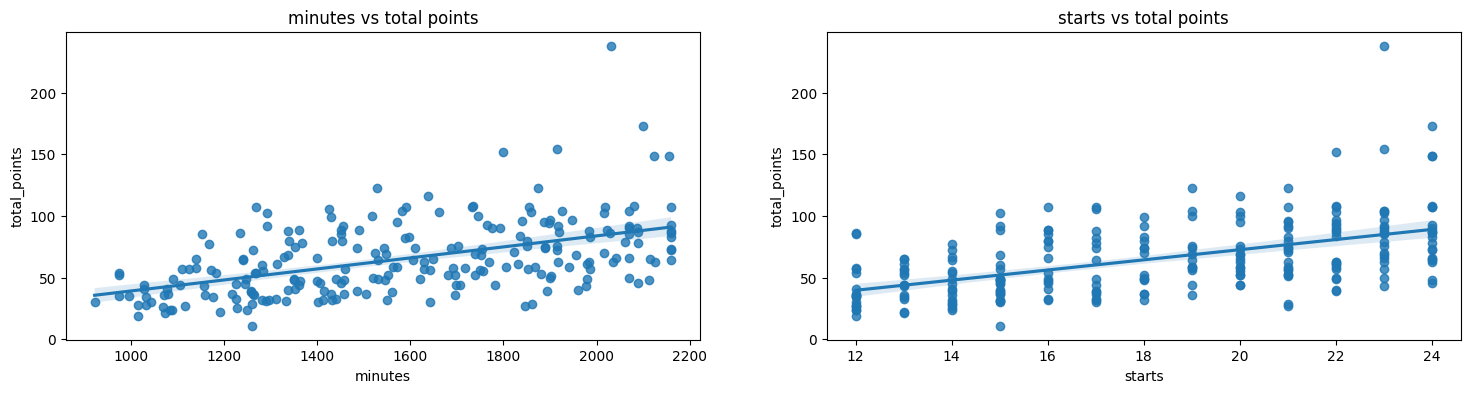

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 4))

ax1.set_title('minutes vs total points')
sns.regplot(x="minutes", y="total_points", data=data, ax=ax1)

ax2.set_title('starts vs total points')
sns.regplot(x='starts', y='total_points', data=data, ax=ax2)

<Axes: title={'center': 'goals scored vs points_per_game'}, xlabel='goals_scored', ylabel='points_per_game'>

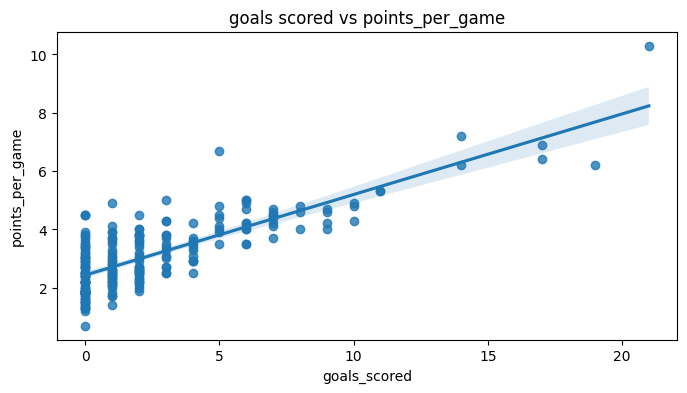

In [16]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))

ax1.set_title('goals scored vs points_per_game')
sns.regplot(x="goals_scored", y="points_per_game", data=data, ax=ax1)


<Axes: title={'center': 'threat vs goals_scored'}, xlabel='threat', ylabel='goals_scored'>

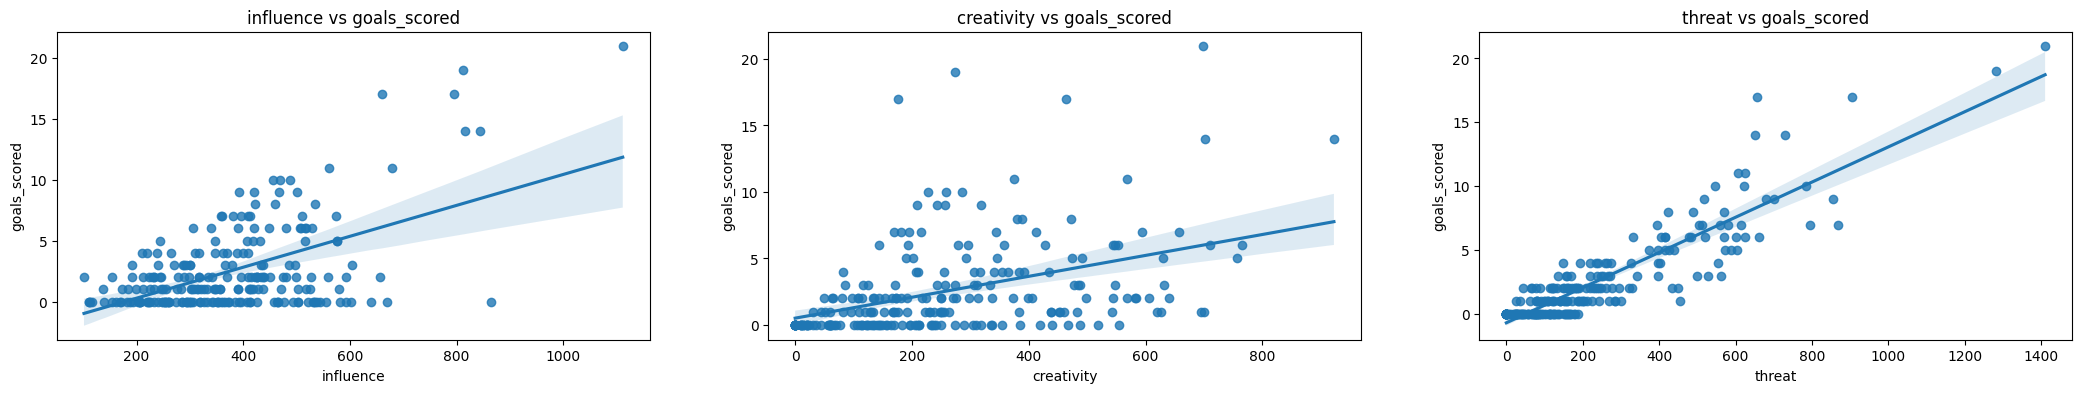

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))

ax1.set_title('influence vs goals_scored')
sns.regplot(x="influence", y="goals_scored", data=data, ax=ax1)

ax2.set_title('creativity vs goals_scored')
sns.regplot(x="creativity", y="goals_scored", data=data, ax=ax2)

ax3.set_title('threat vs goals_scored')
sns.regplot(x="threat", y="goals_scored", data=data, ax=ax3)

<Axes: title={'center': 'assists vs points_per_game'}, xlabel='assists', ylabel='points_per_game'>

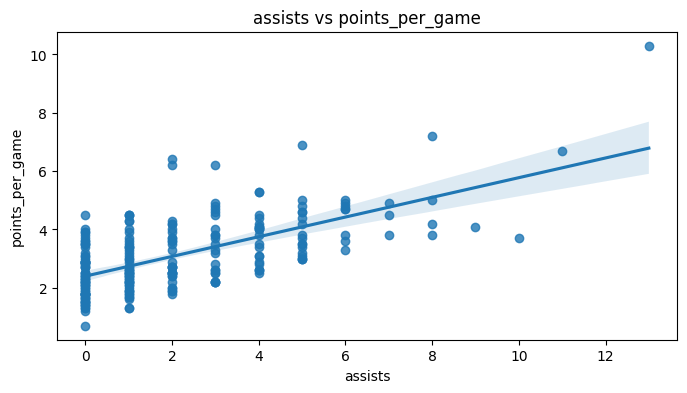

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))

ax1.set_title('assists vs points_per_game')
sns.regplot(x="assists", y="points_per_game", data=data, ax=ax1)

<Axes: title={'center': 'threat vs assists'}, xlabel='threat', ylabel='assists'>

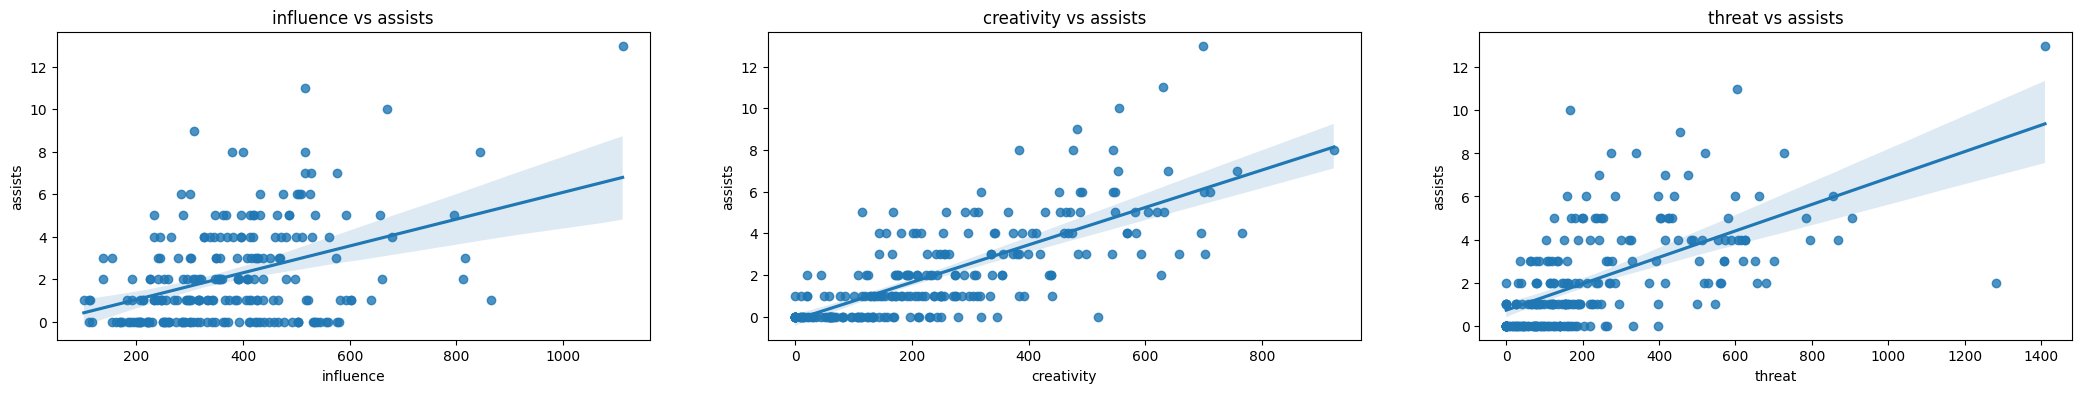

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))

ax1.set_title('influence vs assists')
sns.regplot(x="influence", y="assists", data=data, ax=ax1)

ax2.set_title('creativity vs assists')
sns.regplot(x="creativity", y="assists", data=data, ax=ax2)

ax3.set_title('threat vs assists')
sns.regplot(x="threat", y="assists", data=data, ax=ax3)

In [20]:
data[data['influence'] >= 600][['position', 'points_per_game']].groupby(['position'], as_index=False)['points_per_game'].mean()

,position,points_per_game
0,Defender,3.45
1,Forward,6.20
2,Goalkeeper,3.75
3,Midfielder,7.90


In [21]:
data[data['creativity'] >= 600][['position', 'points_per_game']].groupby(['position'], as_index=False)['points_per_game'].mean()

,position,points_per_game
0,Defender,3.450000
1,Midfielder,4.992308


In [22]:
data[data['threat'] >= 600][['position', 'points_per_game']].groupby(['position'], as_index=False)['points_per_game'].mean()

,position,points_per_game
0,Forward,5.333333
1,Midfielder,5.681818


<Axes: title={'center': 'Midfielder - clean_sheets vs points_per_game'}, xlabel='clean_sheets', ylabel='points_per_game'>

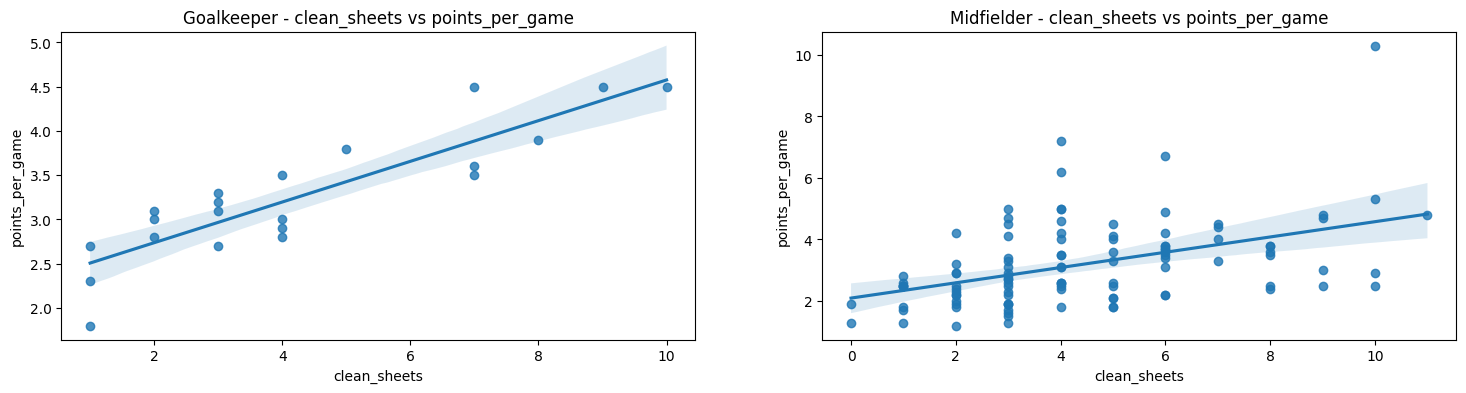

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

ax1.set_title('Goalkeeper - clean_sheets vs points_per_game')
sns.regplot(x="clean_sheets", y="points_per_game", data=data[data['position'] == 'Goalkeeper'], ax=ax1)

ax2.set_title('Midfielder - clean_sheets vs points_per_game')
sns.regplot(x="clean_sheets", y="points_per_game", data=data[data['position'] == 'Midfielder'], ax=ax2)

<Axes: title={'center': 'red cards vs total_points'}, xlabel='red_cards', ylabel='total_points'>

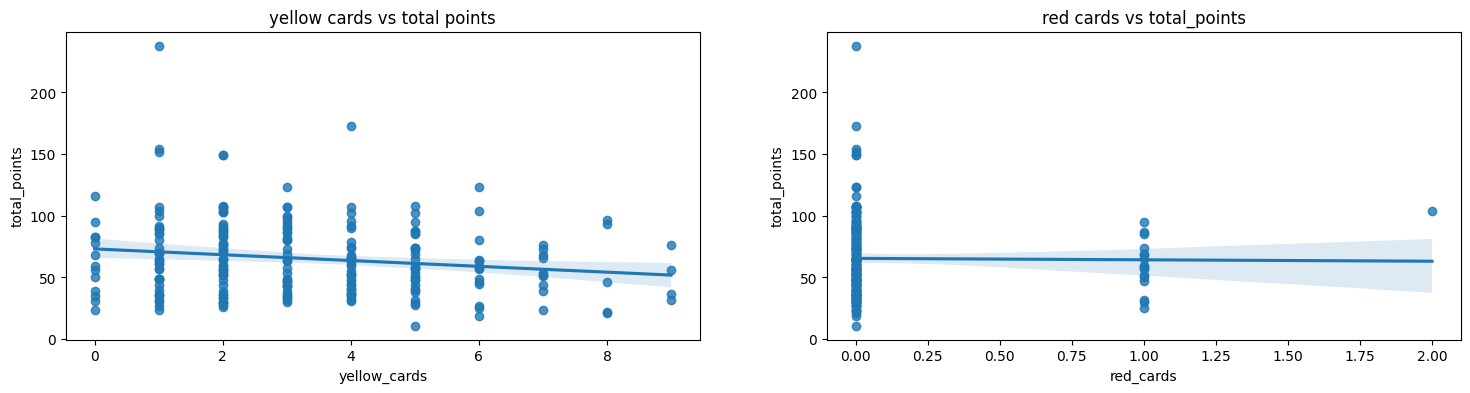

In [24]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(18, 4))

ax1.set_title('yellow cards vs total points')
sns.regplot(x="yellow_cards", y="total_points", data=data, ax=ax1)

ax2.set_title('red cards vs total_points')
sns.regplot(x="red_cards", y="total_points", data=data, ax=ax2)

<Axes: title={'center': 'result_points vs dreamteam'}, xlabel='dreamteam', ylabel='result_points'>

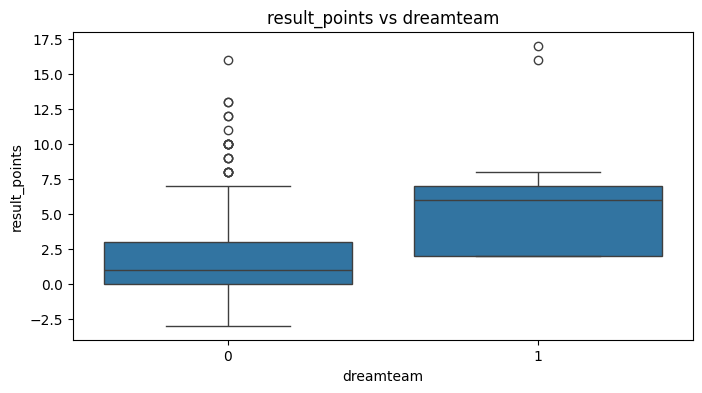

In [25]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))

ax1.set_title('result_points vs dreamteam')
sns.boxplot(x="dreamteam", y="result_points", data=data, ax=ax1)

In [26]:
data.loc[:, 'now_cost'] = data['now_cost'] / 10

<Axes: title={'center': 'position vs points_per_game'}, xlabel='position', ylabel='points_per_game'>

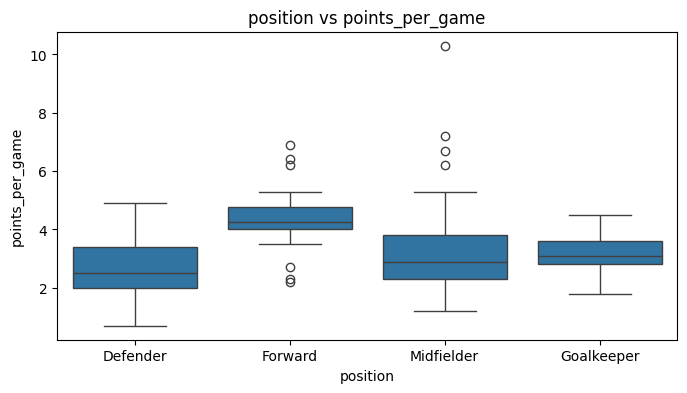

In [27]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 4))

ax1.set_title('position vs points_per_game')
sns.boxplot(x="position", y="points_per_game", data=data, ax=ax1)

<Axes: xlabel='team', ylabel='value'>

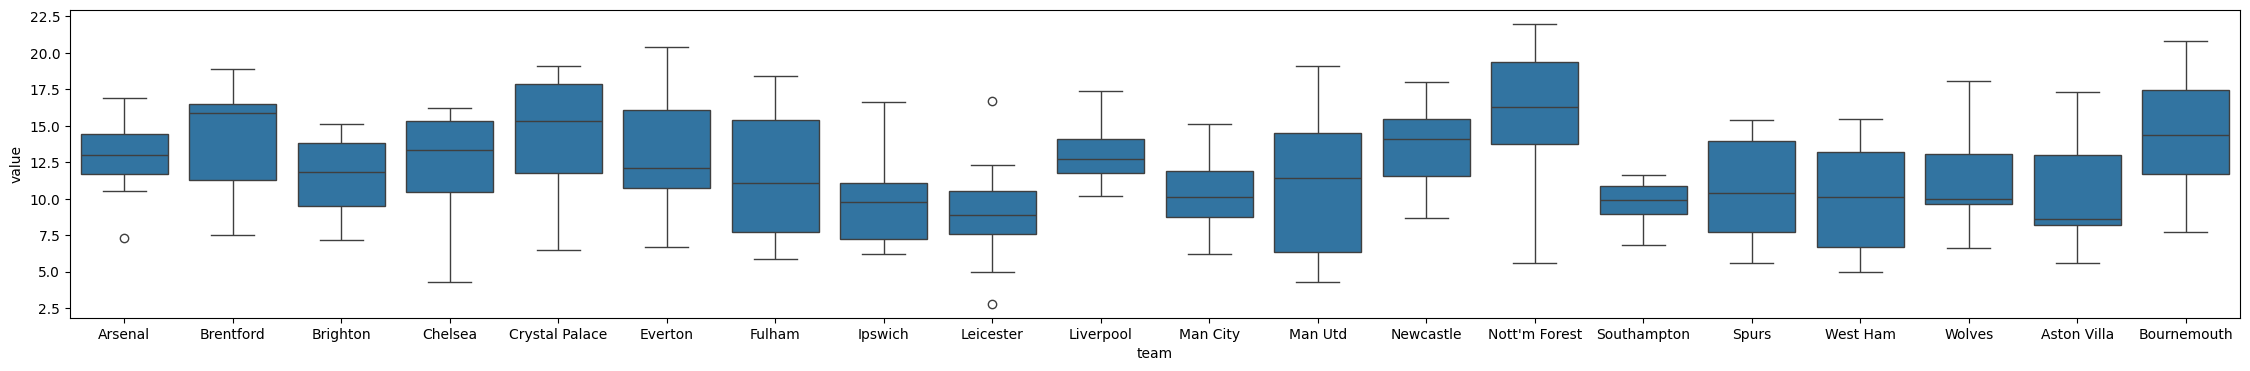

In [28]:
fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(28, 4))

sns.boxplot(x="team", y="value", data=data, ax=ax1)

In [29]:
avg_cost_points_position = data.groupby(['position'])[['now_cost', 'total_points']].mean().rename(columns={'now_cost': 'avg_cost', 'total_points': 'avg_points'}).reset_index()
avg_cost_points_position['points_per_millions'] = (avg_cost_points_position['avg_points'] / avg_cost_points_position['avg_cost']) 
avg_cost_points_position

,position,avg_cost,avg_points,points_per_millions
0,Defender,4.695062,55.333333,11.785433
1,Forward,6.927273,95.772727,13.825459
2,Goalkeeper,4.738095,63.238095,13.346734
3,Midfielder,5.742453,67.188679,11.700345


[Text(0, 0, '11.7854'),
 Text(0, 0, '13.8255'),
 Text(0, 0, '13.3467'),
 Text(0, 0, '11.7003')]

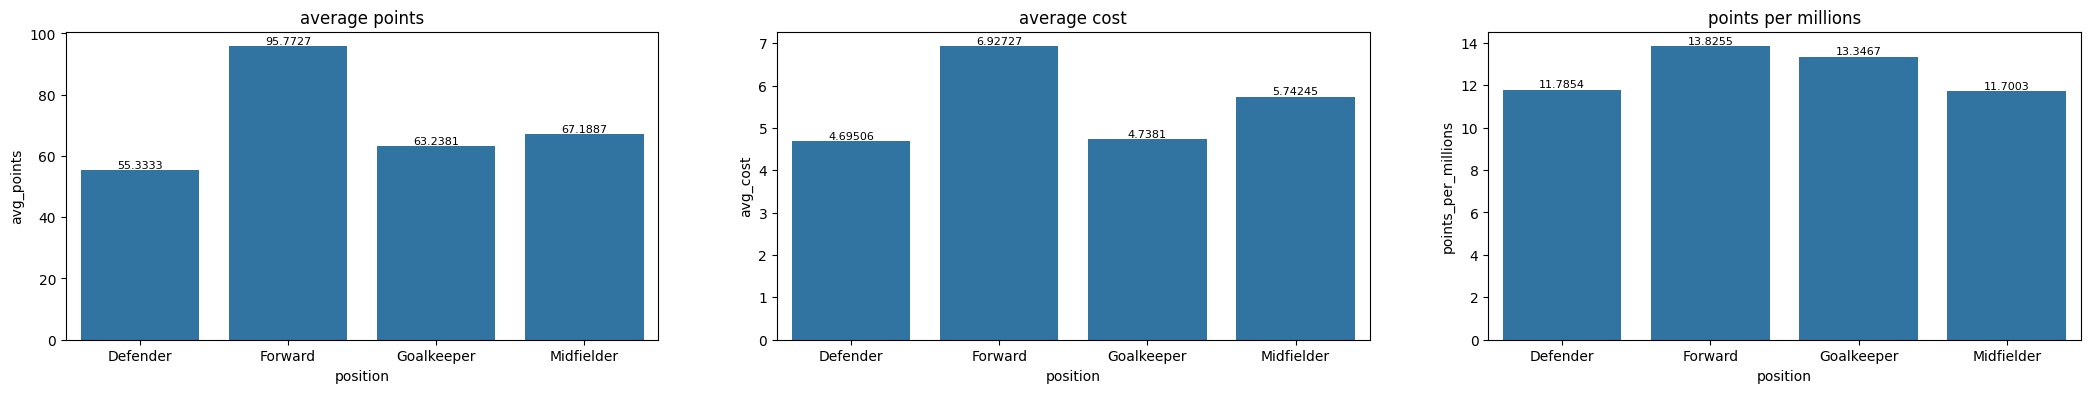

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(26, 4))

ax1.set_title('average points')
sns.barplot(x="position", y="avg_points", data=avg_cost_points_position, ax=ax1)
ax1.bar_label(ax1.containers[0], fontsize=8)

ax2.set_title('average cost')
sns.barplot(x="position", y="avg_cost", data=avg_cost_points_position, ax=ax2)
ax2.bar_label(ax2.containers[0], fontsize=8)

ax3.set_title('points per millions')
sns.barplot(x="position", y="points_per_millions", data=avg_cost_points_position, ax=ax3)
ax3.bar_label(ax3.containers[0], fontsize=8)

Dari charts di atas formasi yang optimal adalah 3-4-3, agar dapat memaksimalkan points per millions pada posisi forward dan mengurangi jumlah defender yang point per millions-nya rendah.

In [31]:
avg_cost_points_position['players'] = [4, 4, 2, 5]

In [32]:
total_budget = 100
n = 15

sum_points_per_millions = avg_cost_points_position['points_per_millions'].sum()
avg_cost_points_position['budget'] = (1 / n * total_budget) * (avg_cost_points_position['points_per_millions'] / sum_points_per_millions) / 0.25 * avg_cost_points_position['players']

In [33]:
data.loc[:, 'points_per_mills'] = data.loc[:, 'total_points'] / data.loc[:, 'now_cost']

C:\Users\kakaf\AppData\Local\Temp\ipykernel_9840\120470964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'points_per_mills'] = data.loc[:, 'total_points'] / data.loc[:, 'now_cost']


In [34]:
grouped_data = data[['team', 'position', 'points_per_mills']].groupby(['team', 'position'], as_index=False)[['points_per_mills']].mean()
pivoted_data = grouped_data.pivot(index='position', columns='team')
pivoted_data

points_per_mills                                                \
team                Arsenal Aston Villa Bournemouth  Brentford   Brighton   
position                                                                    
Defender          13.996202   10.328675   13.853200  10.760163  10.150691   
Forward           12.307692   13.033708   13.928571  16.349206  14.090909   
Goalkeeper        16.909091   13.000000   14.222222  15.909091  13.555556   
Midfielder        11.705015    9.600461   14.976781  14.799582  11.599253   

                                                                       \
team          Chelsea Crystal Palace    Everton     Fulham    Ipswich   
position                                                                
Defender     9.570353      17.432065  14.982913  10.060649   8.531663   
Forward     13.846154      14.109589  12.735690  17.857143  16.607143   
Goalkeeper  15.744681      19.111111  20.392157  14.600000  11.136364   
Midfielder  13.801320      10.319207   9.786056  11.844814   8.758758   

                                                                   \
team        Leicester  Liverpool   Man City    Man Utd  Newcastle   
position                                                            
Defender     6.750156  13.057804  10.091187  11.386894  14.056100   
Forward     16.666667  12.105263  10.136054   6.376812  16.000000   
Goalkeeper   8.863636  12.363636   9.245283  16.600000   9.795918   
Midfielder   9.239686  13.153060  10.671744  10.483161  13.398017   

                                                                       
team       Nott'm Forest Southampton      Spurs   West Ham     Wolves  
position                                                               
Defender       18.172953    9.655939   8.950739  11.157241  10.198010  
Forward        22.000000    8.823529  11.216216        NaN  17.121041  
Goalkeeper     21.400000   11.136364   7.708333   7.247387  11.395349  
Midfielder     12.412756    9.710291  12.109520  10.131061   9.341440

C:\Users\kakaf\AppData\Local\Temp\ipykernel_9840\4025184087.py:19: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im)


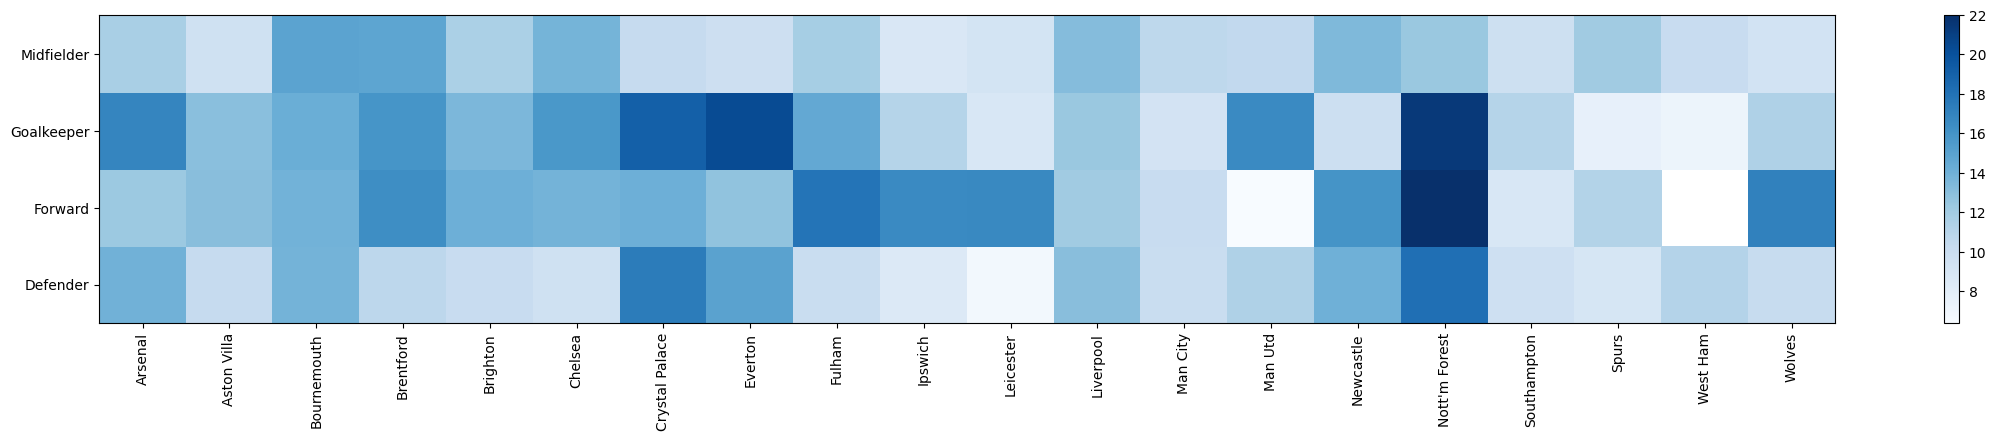

In [35]:
fig, ax = plt.subplots(figsize=(28, 4))
im = ax.pcolor(pivoted_data, cmap='Blues')

#label names
row_labels = pivoted_data.columns.levels[1]
col_labels = pivoted_data.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivoted_data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivoted_data.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [36]:
top_10_gk = data[data['position'] == 'Goalkeeper'].nlargest(10, 'points_per_mills')[['web_name', 'team', 'position', 'now_cost', 'total_points', 'points_per_game', 'points_per_mills', 'goals_scored', 'assists', 'clean_sheets', 'influence', 'creativity', 'threat']]
top_10_df = data[data['position'] == 'Defender'].nlargest(10, 'points_per_mills')[['web_name', 'team', 'position', 'now_cost', 'total_points', 'points_per_game', 'points_per_mills', 'goals_scored', 'assists', 'clean_sheets', 'influence', 'creativity', 'threat']]
top_10_mf = data[data['position'] == 'Midfielder'].nlargest(10, 'points_per_mills')[['web_name', 'team', 'position', 'now_cost', 'total_points', 'points_per_game', 'points_per_mills', 'goals_scored', 'assists', 'clean_sheets', 'influence', 'creativity', 'threat']]
top_10_fw = data[data['position'] == 'Forward'].nlargest(10, 'points_per_mills')[['web_name', 'team', 'position', 'now_cost', 'total_points', 'points_per_game', 'points_per_mills', 'goals_scored', 'assists', 'clean_sheets', 'influence', 'creativity', 'threat']]

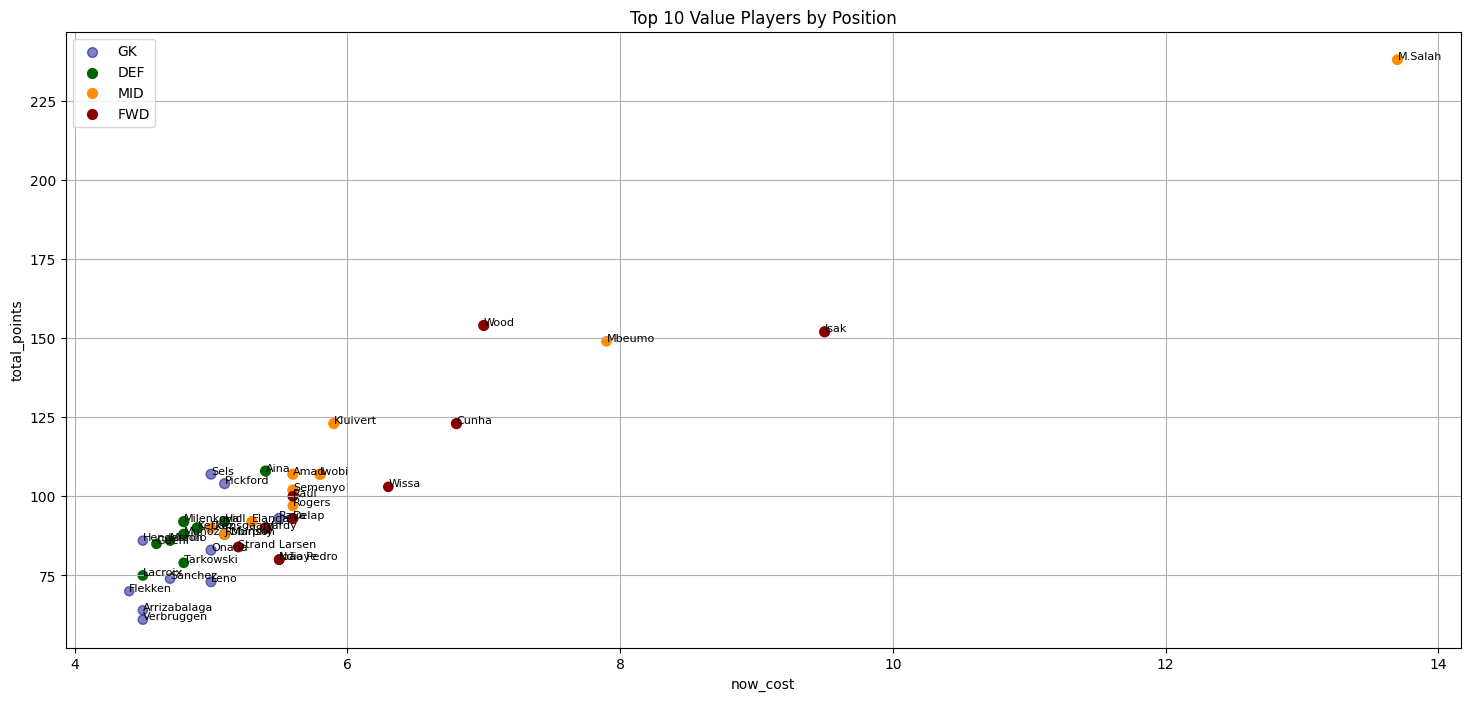

In [37]:
ax = top_10_gk.plot.scatter(x='now_cost', y='total_points', color='DarkBlue', label='GK', s=top_10_gk['now_cost']*10, alpha=.5, figsize=(18, 8), title="Top 10 Value Players by Position", grid=True)
for i, txt in enumerate(top_10_gk.web_name):
    ax.annotate(txt, (top_10_gk.now_cost.iat[i],top_10_gk.total_points.iat[i]), fontsize=8)
    
top_10_df.plot.scatter(x='now_cost', y='total_points', color='DarkGreen', label='DEF', s=top_10_gk['now_cost']*10, ax=ax, grid=True)
for i, txt in enumerate(top_10_df.web_name):
    ax.annotate(txt, (top_10_df.now_cost.iat[i],top_10_df.total_points.iat[i]), fontsize=8)
    
top_10_mf.plot.scatter(x='now_cost', y='total_points', color='DarkOrange', label='MID', s=top_10_gk['now_cost']*10, ax=ax, grid=True)
for i, txt in enumerate(top_10_mf.web_name):
    ax.annotate(txt, (top_10_mf.now_cost.iat[i],top_10_mf.total_points.iat[i]), fontsize=8)
    
top_10_fw.plot.scatter(x='now_cost', y='total_points', color='DarkRed', label='FWD', s=top_10_gk['now_cost']*10, ax=ax, grid=True)
for i, txt in enumerate(top_10_fw.web_name):
    ax.annotate(txt, (top_10_fw.now_cost.iat[i],top_10_fw.total_points.iat[i]), fontsize=8)

In [38]:
for param in ['clean_sheets', 'influence', 'creativity', 'threat']:
    pearson_coef, p_value = stats.pearsonr(top_10_gk[param], top_10_gk['total_points'])
    print(param)
    print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, "with a P-value of P =", p_value)

clean_sheets
The Pearson Correlation Coefficient for clean_sheets is 0.9020838917143585 with a P-value of P = 0.00035680388710791625
influence
The Pearson Correlation Coefficient for influence is 0.021326270493376424 with a P-value of P = 0.9533699949375813
creativity
The Pearson Correlation Coefficient for creativity is 0.052464222522547635 with a P-value of P = 0.885549883267958
threat
The Pearson Correlation Coefficient for threat is 0.09893933909929489 with a P-value of P = 0.7856764109719212


In [39]:
top_10_gk['value_clean_sheets'] = top_10_gk['points_per_mills'] * top_10_gk['clean_sheets']
top_10_gk.sort_values('value_clean_sheets', ascending=False)

,web_name,team,position,now_cost,total_points,points_per_game,points_per_mills,goals_scored,assists,clean_sheets,influence,creativity,threat,value_clean_sheets
338,Sels,Nott'm Forest,Goalkeeper,5.0,107,4.5,21.400000,0,1,10,593.2,0.1,0.0,214.000000
129,Pickford,Everton,Goalkeeper,5.1,104,4.5,20.392157,0,1,9,639.4,20.3,0.0,183.529412
9,Raya,Arsenal,Goalkeeper,5.5,93,3.9,16.909091,0,0,8,502.6,0.0,0.0,135.272727
97,Henderson,Crystal Palace,Goalkeeper,4.5,86,3.6,19.111111,0,0,7,544.0,10.0,4.0,133.777778
290,Onana,Man Utd,Goalkeeper,5.0,83,3.5,16.600000,0,0,7,502.6,13.0,0.0,116.200000
519,Arrizabalaga,Bournemouth,Goalkeeper,4.5,64,3.8,14.222222,0,0,5,465.4,10.1,0.0,71.111111
81,Sánchez,Chelsea,Goalkeeper,4.7,74,3.5,15.744681,0,0,4,554.6,0.0,0.0,62.978723
147,Leno,Fulham,Goalkeeper,5.0,73,3.0,14.600000,0,1,4,582.0,20.0,0.0,58.400000
53,Verbruggen,Brighton,Goalkeeper,4.5,61,2.8,13.555556,0,0,4,534.2,0.0,0.0,54.222222
530,Flekken,Brentford,Goalkeeper,4.4,70,3.0,15.909091,0,1,2,865.0,10.1,0.0,31.818182


In [40]:
avg_cost_points_position[avg_cost_points_position['position'] == 'Goalkeeper']

,position,avg_cost,avg_points,points_per_millions,players,budget
2,Goalkeeper,4.738095,63.238095,13.346734,2,14.051605


Dengan budget 14 juta, kita bisa pilih 2 goalkeeper teratas, Sels dan Pickford, dengan total 10.1 juta. 

In [41]:
for param in ['clean_sheets', 'influence', 'creativity', 'threat']:
    pearson_coef, p_value = stats.pearsonr(top_10_df[param], top_10_df['total_points'])
    print(param)
    print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, "with a P-value of P =", p_value)

clean_sheets
The Pearson Correlation Coefficient for clean_sheets is 0.3333413657199171 with a P-value of P = 0.3465811666323558
influence
The Pearson Correlation Coefficient for influence is -0.345361019159922 with a P-value of P = 0.32836626285277265
creativity
The Pearson Correlation Coefficient for creativity is 0.21011834699556298 with a P-value of P = 0.5601269233552635
threat
The Pearson Correlation Coefficient for threat is -0.3077346914331099 with a P-value of P = 0.3870393559437475


In [54]:
top_10_df['value_clean_sheets'] = top_10_df['points_per_mills'] # * top_10_df['clean_sheets']
top_10_df.sort_values('value_clean_sheets', ascending=False)

,web_name,team,position,now_cost,total_points,points_per_game,points_per_mills,goals_scored,assists,clean_sheets,influence,creativity,threat,value_clean_sheets
325,Aina,Nott'm Forest,Defender,5.4,108,4.5,20.000000,2,1,10,437.4,173.4,65.0,20.000000
342,Milenkovic,Nott'm Forest,Defender,4.8,92,4.0,19.166667,2,1,10,425.8,50.1,237.0,19.166667
96,Guéhi,Crystal Palace,Defender,4.6,85,3.7,18.478261,3,1,7,603.0,115.5,155.0,18.478261
507,Kerkez,Bournemouth,Defender,4.9,90,3.8,18.367347,2,3,6,450.8,372.5,133.0,18.367347
103,Muñoz,Crystal Palace,Defender,4.8,88,3.8,18.333333,2,4,7,498.6,406.1,322.0,18.333333
335,Murillo,Nott'm Forest,Defender,4.7,86,3.7,18.297872,1,0,9,579.4,152.4,140.0,18.297872
306,Hall,Newcastle,Defender,5.1,92,3.8,18.039216,0,5,8,463.8,487.6,124.0,18.039216
152,Robinson,Fulham,Defender,5.1,88,3.7,17.254902,0,10,4,669.2,554.8,166.0,17.254902
109,Lacroix,Crystal Palace,Defender,4.5,75,3.6,16.666667,1,2,7,437.4,44.5,159.0,16.666667
130,Tarkowski,Everton,Defender,4.8,79,3.4,16.458333,0,1,9,602.6,140.2,155.0,16.458333


In [43]:
avg_cost_points_position[avg_cost_points_position['position'] == 'Defender']

,position,avg_cost,avg_points,points_per_millions,players,budget
0,Defender,4.695062,55.333333,11.785433,4,24.815696


Ada 3 defender dari Nott'm Forest di top 4, namun kita pilih Aina karena kuota pemain 1 tim hanya 3. Dengan Sels dipilih sebagai goalkeeper maka tinggal 1 kuota lagi yang bisa digunakan untuk posisi lain.

In [44]:
for param in ['clean_sheets', 'influence', 'creativity', 'threat']:
    pearson_coef, p_value = stats.pearsonr(top_10_mf[param], top_10_mf['total_points'])
    print(param)
    print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, "with a P-value of P =", p_value)

clean_sheets
The Pearson Correlation Coefficient for clean_sheets is 0.4666855534556978 with a P-value of P = 0.17391882373741077
influence
The Pearson Correlation Coefficient for influence is 0.9654213995145278 with a P-value of P = 5.998903174871856e-06
creativity
The Pearson Correlation Coefficient for creativity is 0.5457375151720275 with a P-value of P = 0.10271786392759369
threat
The Pearson Correlation Coefficient for threat is 0.8962918001800663 with a P-value of P = 0.00044579121225447676


In [55]:
top_10_mf['value_creat_threat'] = top_10_mf['points_per_mills'] * top_10_mf['threat'] # (top_10_mf['creativity'] + top_10_mf['threat'])
top_10_mf.sort_values('value_creat_threat', ascending=False)

,web_name,team,position,now_cost,total_points,points_per_game,points_per_mills,goals_scored,assists,clean_sheets,influence,creativity,threat,value_creat_threat
237,M.Salah,Liverpool,Midfielder,13.7,238,10.3,17.372263,21,13,10,1111.6,698.0,1410.0,24494.890511
512,Semenyo,Bournemouth,Midfielder,5.6,102,4.4,18.214286,7,4,7,510.2,412.0,869.0,15828.214286
508,Kluivert,Bournemouth,Midfielder,5.9,123,5.3,20.847458,11,4,10,561.2,374.0,607.0,12654.406780
17,Mbeumo,Brentford,Midfielder,7.9,149,6.2,18.860759,14,3,4,815.8,702.1,652.0,12297.215190
146,Iwobi,Fulham,Midfielder,5.8,107,4.5,18.448276,7,3,5,574.2,657.7,504.0,9297.931034
274,Amad,Man Utd,Midfielder,5.6,107,4.9,19.107143,6,7,6,516.8,552.3,477.0,9114.107143
490,Rogers,Aston Villa,Midfielder,5.6,97,4.2,17.321429,6,5,4,421.0,428.4,404.0,6997.857143
332,Elanga,Nott'm Forest,Midfielder,5.3,92,3.8,17.358491,3,8,8,379.0,476.6,341.0,5919.245283
308,J.Murphy,Newcastle,Midfielder,5.1,88,4.2,17.254902,4,8,6,399.6,383.7,274.0,4727.843137
529,Damsgaard,Brentford,Midfielder,5.0,90,3.8,18.000000,2,7,6,526.4,639.4,242.0,4356.000000


In [46]:
avg_cost_points_position[avg_cost_points_position['position'] == 'Midfielder']

,position,avg_cost,avg_points,points_per_millions,players,budget
3,Midfielder,5.742453,67.188679,11.700345,5,30.795667


Dengan budget yang ada, pilihan sebenarnya ada di Mbeumo, Semenyo, Iwobi, Kluivert dan Amad. Namun dengan sisa budget dari goalkeeper dan defender bisa digunakan sebagai tambahan untuk mengganti Amad dengan M.Salah yang merupakan top midfielder.

In [47]:
for param in ['clean_sheets', 'influence', 'creativity', 'threat']:
    pearson_coef, p_value = stats.pearsonr(top_10_fw[param], top_10_fw['total_points'])
    print(param)
    print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, "with a P-value of P =", p_value)

clean_sheets
The Pearson Correlation Coefficient for clean_sheets is 0.3850008172400925 with a P-value of P = 0.27193440267352326
influence
The Pearson Correlation Coefficient for influence is 0.9217695417378511 with a P-value of P = 0.0001489761482320475
creativity
The Pearson Correlation Coefficient for creativity is 0.3848673733030226 with a P-value of P = 0.27211482870170034
threat
The Pearson Correlation Coefficient for threat is 0.8022056147700733 with a P-value of P = 0.005234186342458937


In [56]:
top_10_fw['value_threat'] = top_10_fw['points_per_mills'] * (top_10_fw['influence'] + top_10_fw['threat'])
top_10_fw.sort_values('value_threat', ascending=False)

,web_name,team,position,now_cost,total_points,points_per_game,points_per_mills,goals_scored,assists,clean_sheets,influence,creativity,threat,value_threat
340,Wood,Nott'm Forest,Forward,7.0,154,6.4,22.000000,17,2,11,660.0,176.9,657.0,28974.000000
307,Isak,Newcastle,Forward,9.5,152,6.9,16.000000,17,5,7,795.8,463.7,905.0,27212.800000
443,Cunha,Wolves,Forward,6.8,123,5.3,18.088235,11,4,4,678.6,567.6,625.0,23579.823529
150,Raúl,Fulham,Forward,5.6,100,4.2,17.857143,9,2,6,420.8,208.4,680.0,19657.142857
26,Wissa,Brentford,Forward,6.3,103,4.9,16.349206,10,3,4,469.6,226.7,621.0,17830.444444
171,Delap,Ipswich,Forward,5.6,93,4.0,16.607143,9,2,3,392.0,242.8,518.0,15112.500000
458,Strand Larsen,Wolves,Forward,5.2,84,3.7,16.153846,7,2,4,360.2,195.7,560.0,14864.769231
213,Vardy,Leicester,Forward,5.4,90,4.1,16.666667,7,4,1,357.6,181.8,513.0,14510.000000
127,Ndiaye,Everton,Forward,5.5,80,3.5,14.545455,6,0,11,448.0,278.9,331.0,11330.909091
42,João Pedro,Brighton,Forward,5.5,80,4.4,14.545455,5,5,5,347.8,291.7,427.0,11269.818182


In [49]:
avg_cost_points_position[avg_cost_points_position['position'] == 'Forward']

,position,avg_cost,avg_points,points_per_millions,players,budget
1,Forward,6.927273,95.772727,13.825459,4,29.111227


Untuk forward pilihannya Isak, Wood, Cunha dan Wissa yang mempunyai points per game tertinggi.

In [50]:

lineups = data[(data['web_name'].isin(['Pickford', 'Sels', 'Aina', 'Kerkez', 'Hall', 'Guéhi', 'Kluivert', 'Mbeumo', 'Semenyo', 'Iwobi', 'M.Salah', 'Wood', 'Isak', 'Cunha', 'Wissa'])) & (~data['first_name'].isin(['Nathan', 'Emiliano']))][['web_name', 'first_name', 'team', 'position', 'total_points', 'now_cost', 'form']]
sort = {'Goalkeeper': 0, 'Defender': 1, 'Midfielder': 2, 'Forward': 3}
lineups.sort_values(by=['position'], key=lambda x: x.map(sort))

,web_name,first_name,team,position,total_points,now_cost,form
129,Pickford,Jordan,Everton,Goalkeeper,104,5.1,3.4
338,Sels,Matz,Nott'm Forest,Goalkeeper,107,5.0,4.4
96,Guéhi,Marc,Crystal Palace,Defender,85,4.6,7.5
306,Hall,Lewis,Newcastle,Defender,92,5.1,3.2
325,Aina,Ola,Nott'm Forest,Defender,108,5.4,3.8
507,Kerkez,Milos,Bournemouth,Defender,90,4.9,3.8
17,Mbeumo,Bryan,Brentford,Midfielder,149,7.9,3.2
146,Iwobi,Alex,Fulham,Midfielder,107,5.8,4.4
237,M.Salah,Mohamed,Liverpool,Midfielder,238,13.7,6.0
508,Kluivert,Justin,Bournemouth,Midfielder,123,5.9,11.2


In [51]:
lineups.groupby('position')['position'].count()

position
Defender      4
Forward       4
Goalkeeper    2
Midfielder    5
Name: position, dtype: int64

In [52]:
lineups.groupby('team')['team'].count()

team
Bournemouth       3
Brentford         2
Crystal Palace    1
Everton           1
Fulham            1
Liverpool         1
Newcastle         2
Nott'm Forest     3
Wolves            1
Name: team, dtype: int64

In [53]:
print(f'total cost : ', lineups['now_cost'].sum())

total cost :  98.60000000000001


### Conclusions
- Jumlah menit bermain dan starter berkorelasi positif pada poin.
- Jumlah gol, asisst, clean sheet berkorelasi positif pada poin, sesuai dengan penjelasan di website Fantasy Premier League, bahwa gol, assist, clean sheet adalah penghasil poin.
- Kartu kuning dan kartu merah tidak menunjukkan korelasi yang kuat pada poin.
- Poin yang diperoleh pemain pada suatu gameweek tidak menjadikan penentu utama pemilihan dream team.
- Secara keseluruan, posisi forward mempunyai figure poin tertinggi, hal ini menunjukkan semakin dekat posisi  ke gawang lawan, semakin tinggi perolehan poinnya. 
- Meskipun midfielder mempunyai poin maksimal yang tinggi, minimal poinnya lebih rendah dibandingkan forward dan sedikit lebih tinggi dari minimal poin defender. Menunjukkan variasi peran midfielder, bertahan atau lebih condong menyerang sehingga menghasilkan poin lebih banyak.
- Bournemouth, tim dengan value tertinggi, mengindikasikan mereka efisien per cost dalam menghasilkan poin.
- Forward menghasilkan poin tertinggi untuk setiap cost sebesar 13.176162. Artinya untuk setiap 1 juta, rata-rata forward menghasilkan sekitar 13 poin.
- Dengan points per millions secara berurutan tertinggi ke terendah forward sebesar 13.176162, goalkeeper 13.126967, defender 11.372706 dan midfielder 11.237166, idealnya menggunakan formasi 3-4-3 untuk memaksimalkan jumlah forward sehingga potensi menghasilkan poinnya termaksimalkan.
- Proporsi budget disesuaikan dengan formasi dan points per millions, menghasilkan angka:
    | position | # players | budget |
    |----------|---------|--------|
    | Defender | 4 | 24.800943 | 
    | Forward | 4 | 28.733819 | 
    | Goalkeeper | 2 | 14.313269 | 
    | Midfielder | 5 | 30.631709 | 
- Notingham Forest adalah tim yang mempunyai points per millions tinggi untuk posisi goalkeeper, defender dan forward.
- Berdasar P value, maka berikut adalah fitur yang bisa digunakan untuk memprediksi point:
    - goalkeeper & defender : clean sheets
    - midfielder : creativity dan threat
    - forward : threat